# Reading and visualising data

In [2]:
import numpy as np
import tools21cm as t2c

Different simulations codes write their output in different formats. It is same for observations, which will differ based of the observation facility and research group. One has to define a function that is specific to that case.

In order to manipulate and analyse data with tools21cm, we want the data to be read in as numpy array. 

### Reading data
Here we read the ionisation fraction data cube produced with the [C2Ray](https://github.com/garrelt/C2-Ray3Dm) code. For the density field, we will consider the gridded density field created by an N-body, [CubeP3M](https://github.com/jharno/cubep3m), which were used by [C2Ray](https://github.com/garrelt/C2-Ray3Dm) code as input.

In [4]:
t2c.set_sim_constants(500)

xfrac = t2c.XfracFile('/path/to/datafiles/xfrac3d_7.391.bin').xi
dens  = t2c.DensityFile('/path/to/datafiles/7.391n_all.dat').cgs_density

The above function `set_sim_constants` is useful only for `C2Ray` simulation outputs. This function takes as its only parameter the box side in cMpc/h and sets simulations constants.

See [here](https://tools21cm.readthedocs.io/contents.html#module-t2c.read_files) for more data reading functions.

### Visualising the data

You can of course plot the data you read using your favorite plotting software. For example, if you have `matplotlib` installed.

In [5]:
import matplotlib.pyplot as plt

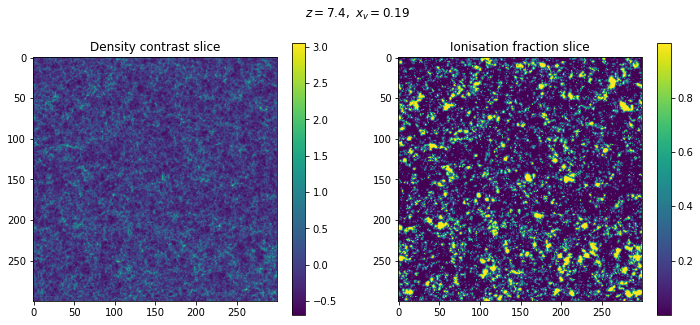

In [18]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.suptitle('$z=7.4,~x_v=${0:.2f}'.format(xfrac.mean()))

plt.subplot(121)
plt.title('Density contrast slice')
plt.imshow(dens[0,:,:]/dens.mean()-1)
plt.colorbar()

plt.subplot(122)
plt.title('Ionisation fraction slice')
plt.imshow(xfrac[0,:,:])
plt.colorbar()

plt.show()

# 21 cm brightness temperature

We can construct the 21 cm brightness temperature from the density field and ionisation fraction field using `calc_dt`. Due to the absence of zero baseline, the mean signal will be subtracted from each frequency channel. One can use `subtract_mean_channelwise` to add this effect.

In [21]:
dT = t2c.calc_dt(xfrac, dens, 7.391)
dT_subtracted = t2c.subtract_mean_channelwise(dT, axis=2)

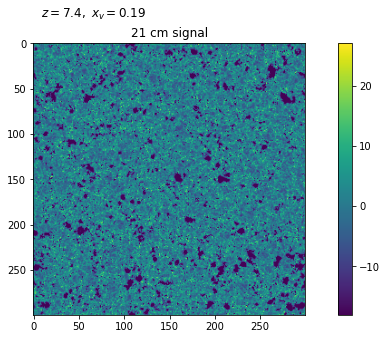

In [22]:
plt.rcParams['figure.figsize'] = [12, 5]

plt.title('21 cm signal')
plt.imshow(dT_subtracted[0,:,:])
plt.colorbar()

plt.show()

### 21 cm power spectrum

One of the most interesting metric to analyse this field is the power spectrum. Below we estimate the spherically average power spectrum.

In [23]:
ps, ks = t2c.power_spectrum_1d(dT_subtracted, kbins=15, box_dims=500/0.7)

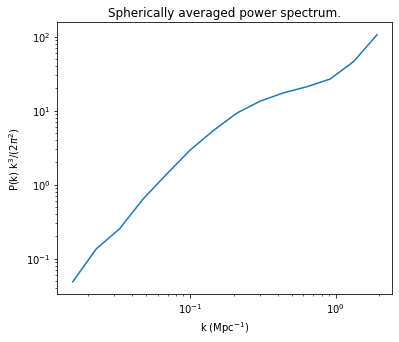

In [29]:
plt.rcParams['figure.figsize'] = [6, 5]

plt.title('Spherically averaged power spectrum.')
plt.loglog(ks, ps*ks**3/2/np.pi**2)
plt.xlabel('k (Mpc$^{-1}$)')
plt.ylabel('P(k) k$^{3}$/$(2\pi^2)$')

plt.show()

# Mock 21 cm observation

First we create the radio telescope noise. For this, we simulate the uv coverage a radio telescope (here SKA-Low).

In [30]:
uv, Nant = t2c.get_uv_daily_observation(dT.shape[0], 7.391, total_int_time=6., boxsize=500/0.7)

Making uv map from daily observations.
Completed: 100.0 %

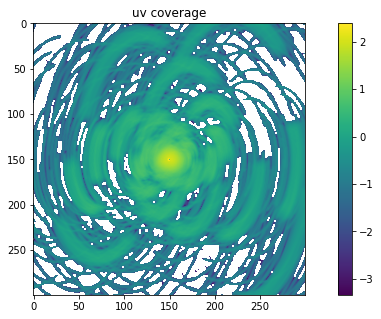

In [32]:
plt.rcParams['figure.figsize'] = [12, 5]

plt.title('uv coverage')
plt.imshow(np.log10(np.fft.fftshift(uv)))
plt.colorbar()

plt.show()

Once we have the uv map for our desired per day observation, we can estimate the noise cube by assuming that the sky observed for the same duration every day. One should note that in the real data this assumption will not hold. Therefore one should be careful while using this noise simulation to analyse real observations.

In [34]:
noise = t2c.noise_cube_coeval(dT.shape[0], 7.391, total_int_time=6., obs_time=3000, boxsize=500/.7, uv_map=uv)


Creating the noise cube...
Completed: 100.0%
...Noise cube created.


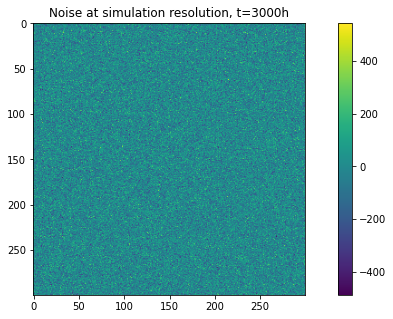

In [35]:
plt.rcParams['figure.figsize'] = [12, 5]

plt.title('Noise at simulation resolution, t=3000h')
plt.imshow(noise[0,:,:])
plt.colorbar()

plt.show()